<a href="https://colab.research.google.com/github/ikwak2/APCP/blob/master/8_namgong/meta_test3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Meta-analysis for proportions

Check this [video](https://www.youtube.com/watch?v=2wbXTFvaRnM), a [paper](https://www.nature.com/articles/srep28564), and a [github](https://github.com/wnk4242/metaprops)

[Other code](https://rpubs.com/pekong/532068)

In [70]:
library(tidyverse)

In [71]:
system("gdown --id 1D33r57HVA5WZ4MyUBmWhpoHAeiELho0V")
system("gdown --id 1CwLdNpTq84oF1oQn3LDwhKA-eWz2a8GL")
system("gdown --id 1uWpmlExj2gDgiotIxi6pEUZdWQH0Tkk_")
system("gdown --id 1MIFdBD5DuPySwujoZ_BwmyoWQ596utr4")





In [72]:
sep1 = read_csv("sepsis.csv",locale=locale('ko',encoding='euc-kr'))


Rows: 28 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): AuthorYear, Center, Center_name, Sepsis_criteria, Endpoint
dbl (3): Nstudy, death, total

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [73]:
sep2 = read_csv("sepsis_inhospital.csv",locale=locale('ko',encoding='euc-kr'))

Rows: 16 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): AuthorYear, Center, Center_name, Sepsis_criteria, Endpoint
dbl (3): Nstudy, death, total

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [74]:

septic1 = read_csv("septic_shock.csv",locale=locale('ko',encoding='euc-kr'))
septic2 = read_csv("septic_shock_inhospital.csv",locale=locale('ko',encoding='euc-kr'))

Rows: 23 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): AuthorYear, Center, Center_name, Sepsis_criteria, Endpoint
dbl (3): Nstudy, death, total

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 15 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): AuthorYear, Center, Center_name, Sepsis_criteria, Endpoint
dbl (3): Nstudy, death, total

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [75]:
sep1

Nstudy,AuthorYear,Center,Center_name,Sepsis_criteria,Endpoint,death,total
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
19,Lee 2022,multicenter,Korean Sepsis Alliance (KSA),Sepsis-3,28-day,243,936
532,Ko 2018,multicenter,Korean Shock Society (KoSS),Sepsis-3,28-day,119,484
983,Kim 2013,multicenter,SAPS 3 in Korean Intensive care unit (VSKI) cohort,Sepsis-2,28-day,148,416
266,Kim 2020,multicenter,가톨릭,Sepsis-1,30-day,124,175
234,Kim 2020,single,건국대병원,Sepsis-3,30-day,66,215
3875,Jeong 2020,single,건국대병원,Sepsis-3,30-day,48,233
3886,Lee 2017,single,건국대병원,Sepsis-3,30-day,37,222
3892,Jang 2016,single,건국대병원,Sepsis-2,28-day,57,199
767,Hong 2016,single,건국대병원,Sepsis-2,28-day,42,470


In [76]:
sep2

Nstudy,AuthorYear,Center,Center_name,Sepsis_criteria,Endpoint,death,total
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
3,Im 2022,multicenter,Korean Sepsis Alliance (KSA),Sepsis-3,Inhospital,774,3035
3743,Jeon 2019,multicenter,Korean Sepsis Alliance (KSA),Sepsis-3,inhospital,267,977
294,Ko 2020,multicenter,Korean Shock Society (KoSS),Sepsis,inhospital,513,2250
266,Kim 2020,multicenter,가톨릭,Sepsis-1,inhospital,67,175
2277,Kim 2017,single,건국대학교병원,Sepsis-3,inhospital,40,157
1923,Kim 2019,single,부산대병원,Sepsis-3,Inhospital,162,516
1102,Song 2012,single,삼성서울병원,Sepsis-2,Inhospital,48,474
100,Im 2021,single,삼성서울병원,Sepsis-3,Inhospital,51,217
153,Wang 2021,multicenter,"서울대, 분당서울대, 보라매",Sepsis-3,Inhospital,636,2526


In [77]:
septic1

Nstudy,AuthorYear,Center,Center_name,Sepsis_criteria,Endpoint,death,total
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1099,Kim 2012,multicenter,MOSAICS study,Sepsis-2,28-day,76,251
25,Yeo 2022,multicenter,Korean Sepsis Alliance,Sepsis-3,28-day,121,298
1064,Park 2012,multicenter,Korean Sepsis Registry System (KSRS),Sepsis-1,28-day,274,1192
28,Kim 2022,multicenter,Korean Shock Society (KoSS),Sepsis-3,28-day,1037,4625
483,Ryoo 2018,multicenter,Korean Shock Society (KoSS),Sepsis,28-day,211,829
3769,Jang 2016,single,건국대병원,Sepsis-2,28-day,57,175
234,Kim 2020,single,건국대병원,Sepsis-3,30-day,48,106
3915,Lee 2012,single,경희대병원,Sepsis-2,28-day,38,204
1644,Song 2021,single,고대안산병원,Sepsis-3,30-day,201,410


In [78]:
septic2

Nstudy,AuthorYear,Center,Center_name,Sepsis_criteria,Endpoint,death,total
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
25,Yeo 2022,multicenter,Korean Sepsis Alliance,Sepsis-3,Inhospital,136,298
1099,Kim 2012,multicenter,MOSAICS study,Sepsis-2,Inhospital,86,251
1064,Park 2012,multicenter,Korean Sepsis Registry System (KSRS),Sepsis-1,Inhospital,334,1192
5,You 2022,multicenter,Korean Shock Society (KoSS),Sepsis-3,Inhospital,444,2049
311,Kim 2020,single,고대안산병원,Sepsis-3,Inhospital,102,208
805,Park 2015,single,고대안암병원,Sepsis-1,Inhospital,38,133
262,Im 2020,single,삼성서울병원,Sepsis-3,Inhospital,36,145
13,Cha 2022,single,서울대병원,Sepsis-3,Inhospital,201,467
15,Kim 2022,single,서울성모,Sepsis-3,Inhospital,30,60


In [79]:
#install.packages("metafor")
#install.packages("meta")
#install.packages("weightr")
install.packages(c("metafor","meta","weightr"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [80]:
sep1['prop'] = sep1[,'death'] / sep1[,'total']

In [81]:
sep1 %>% head

Nstudy,AuthorYear,Center,Center_name,Sepsis_criteria,Endpoint,death,total,prop
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
19,Lee 2022,multicenter,Korean Sepsis Alliance (KSA),Sepsis-3,28-day,243,936,0.2596154
532,Ko 2018,multicenter,Korean Shock Society (KoSS),Sepsis-3,28-day,119,484,0.2458678
983,Kim 2013,multicenter,SAPS 3 in Korean Intensive care unit (VSKI) cohort,Sepsis-2,28-day,148,416,0.3557692
266,Kim 2020,multicenter,가톨릭,Sepsis-1,30-day,124,175,0.7085714
234,Kim 2020,single,건국대병원,Sepsis-3,30-day,66,215,0.3069767
3875,Jeong 2020,single,건국대병원,Sepsis-3,30-day,48,233,0.2060086


In [ ]:
subd<-na.omit(subd)

In [ ]:
subd[,'sepsis_d'] / subd[,'sepsis_tot']

[1] 0.21669107 0.25961538 0.40604027 0.09723757 0.16216216 0.09718670
 [7] 0.22537879 0.25217736 0.18548387 0.21649485 0.21808511 0.19769504
[13] 0.26421405 0.17699115 0.16000000 0.35789474 0.21918260 0.16666667
[19] 0.08936170 0.17692308 0.26717557

In [ ]:
subd['sepsis_prop'] = subd[,'sepsis_d'] / subd[,'sepsis_tot']

In [82]:
library(metafor)
library(meta)

In [83]:
subd = sep1

In [64]:
subd$Sepsis_criteria

[1] "Sepsis-3"   "Sepsis-3"   "Sepsis-2"   "Sepsis-1"   "Sepsis-3"  
 [6] "Sepsis-3"   "Sepsis-3"   "Sepsis-2"   "Sepsis-2"   "Sepsis"    
[11] "Sepsis-3"   "Sepsis-3"   "Sepsis-2,3" "Sepsis-3"   "Sepsis-3"  
[16] "Sepsis-1"   "Sepsis-2,3" "Sepsis-2"   "Sepsis-1"   "Sepsis-2"  
[21] "Sepsis-2"   "Sepsis-3"   "Sepsis-2"   "Sepsis-3"   "Sepsis-3"  
[26] "Sepsis-2"   "Sepsis-3"   "Sepsis-3"

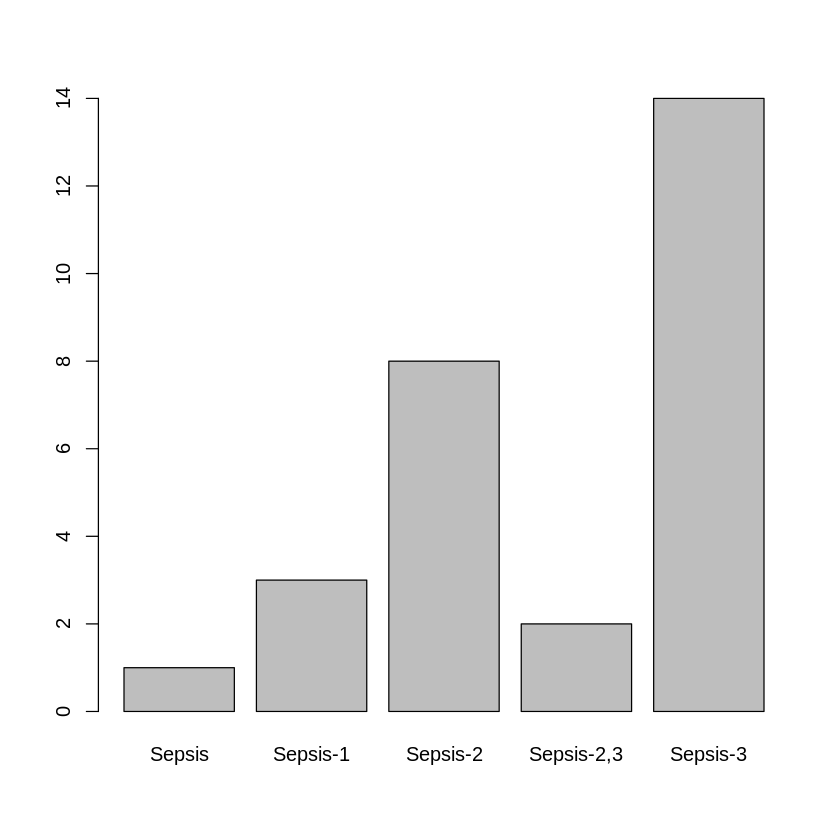

In [65]:

barplot(Serotype <- table(subd$Sepsis_criteria))


## Calculating overall summary proportion

logit 변환: 이유 -> proportion 이 0.2 근처라 정규분포로 보기 애매한 면이 있어 로그변환 취해서 해주는것이 더 좋음 

In [17]:
ies.logit=escalc(xi=death,ni=total,measure="PLO",data=sep1)  ## PLO 가 logit transformation 하는 부분
pes.logit=rma(yi,vi,data=ies.logit,method="DL",weighted=TRUE)  ## rma 는 random effect model , DL 은 이질성의 정도(degree of heterogeneity)
pes=predict(pes.logit,transf=transf.ilogit)  ## logit 변환한거 proportion 으로 되돌림
print(pes,digits=6);print(pes.logit,digits=4);confint(pes.logit,digits=2)


     pred    ci.lb    ci.ub    pi.lb    pi.ub 
 0.238829 0.209929 0.270345 0.119088 0.421375 


Random-Effects Model (k = 28; tau^2 estimator: DL)

tau^2 (estimated amount of total heterogeneity): 0.1774 (SE = 0.0810)
tau (square root of estimated tau^2 value):      0.4211
I^2 (total heterogeneity / total variability):   95.70%
H^2 (total variability / sampling variability):  23.25

Test for Heterogeneity:
Q(df = 27) = 627.8340, p-val < .0001

Model Results:

estimate      se      zval    pval    ci.lb    ci.ub      
 -1.1591  0.0848  -13.6657  <.0001  -1.3254  -0.9929  *** 

---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1




       estimate ci.lb ci.ub 
tau^2      0.18  0.24  0.75 
tau        0.42  0.48  0.87 
I^2(%)    95.70 96.72 98.95 
H^2       23.25 30.51 95.62 


rma 가 heterogeneity 측도인 Q, I2 tau2 보여줌

summary proportion 은 0.205, 95% 신뢰구간 (.1838~.2285)  
$I^2$ 는 92.94% 
$tau^2$ 는 total between study variance

$Q$ 통계량이 유의미함 -> 포함된 연구들이 공통의 effect size를 공유하지 않음. -> meta analysis 결과가 많은 heterogeneity 를 포함함 : 연구들이 서로 이질적임 -> 서브그룹을 나누려는 시도 해 볼 필요가 있음




In [18]:

sep1

Nstudy,AuthorYear,Center,Center_name,Sepsis_criteria,Endpoint,death,total,prop
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
19,Lee 2022,multicenter,Korean Sepsis Alliance (KSA),Sepsis-3,28-day,243,936,0.2596154
532,Ko 2018,multicenter,Korean Shock Society (KoSS),Sepsis-3,28-day,119,484,0.2458678
983,Kim 2013,multicenter,SAPS 3 in Korean Intensive care unit (VSKI) cohort,Spesis-2,28-day,148,416,0.3557692
266,Kim 2020,multicenter,가톨릭,Sepsis-1,30-day,124,175,0.7085714
234,Kim 2020,single,건국대병원,Sepsis-3,30-day,66,215,0.3069767
3875,Jeong 2020,single,건국대병원,Sepsis-3,30-day,48,233,0.2060086
3886,Lee 2017,single,건국대병원,Sepsis-3,30-day,37,222,0.1666667
3892,Jang 2016,single,건국대병원,Sepsis-2,28-day,57,199,0.2864322
767,Hong 2016,single,건국대병원,Sepsis-2,28-day,42,470,0.0893617


In [20]:
pes.summary=metaprop(death, #cases,
                     total, #total,
                     AuthorYear,
                     data=sep1,
                     #sortvar(precision)
#                     byvar=Center,
                     sm="PLO",
                     method.ci="NAsm",
                     method.tau="DL",
                     incr=0.5,
                     allincr=FALSE,
                     addincr=FALSE,
#                     tau.common=TRUE,
#                     tau.preset=sqrt(subganal.studydesign$tau2),
                     title="")

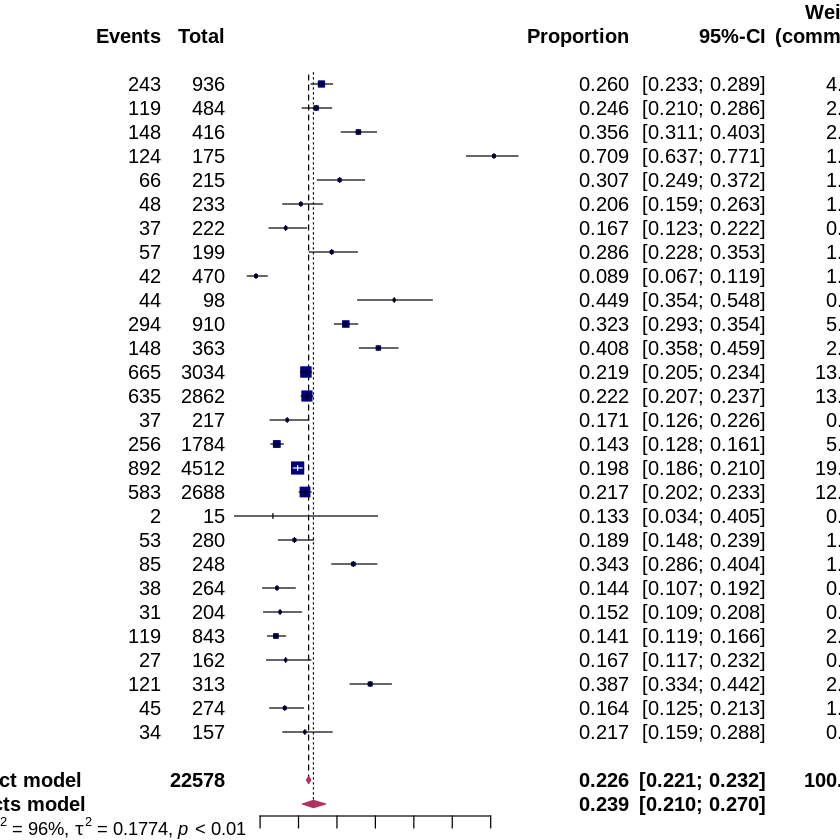

In [26]:
forest(pes.summary,slab=sep1$AuthorYear, xlab="Summary proportions", refline=pes.summary$pred,digits=3, 
       squaresize = 0.5, col.square="navy", col.square.lines="navy",
       col.diamond="maroon", col.diamond.lines="maroon" )

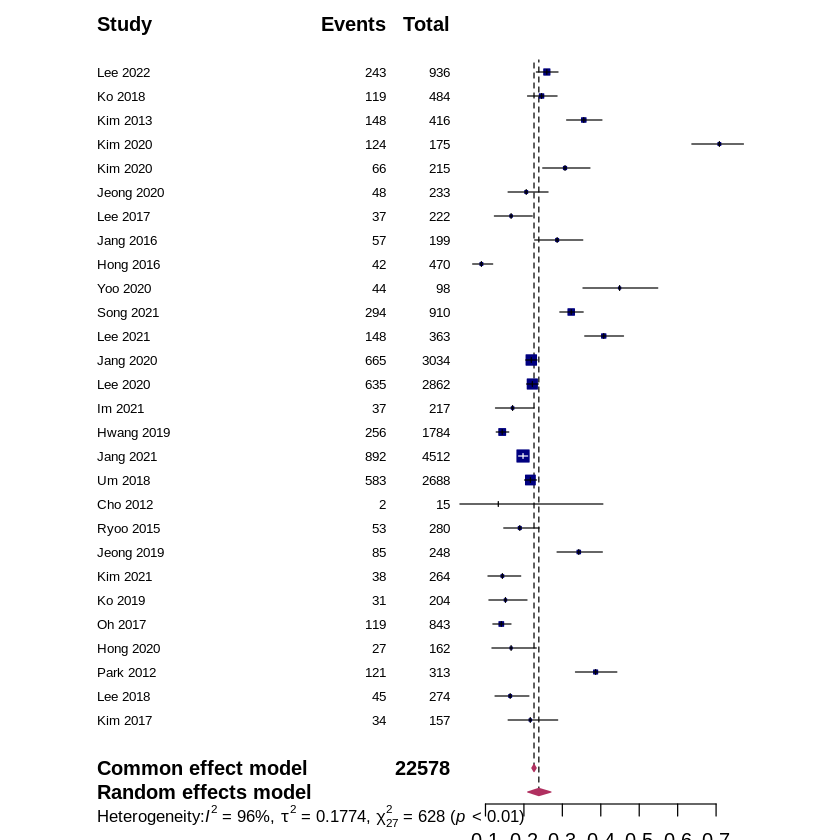

In [23]:
forest(pes.summary,
#       sortvar=precision,
#       xlim = c(0,1), pscale =1000, #if proportions are too low, consider rescaling proportions
       rightcols=FALSE,
       fs.xlab=8,
       fs.study=8,
       fs.study.lables=10,
       fs.heading=12,
       squaresize = 0.5, col.square="navy", col.square.lines="navy",
       col.diamond="maroon", col.diamond.lines="maroon",
       comb.fixed=FALSE,
       lty.random=2, #lty.fixed=0,
       type.study="square",
       type.random="diamond",
       ff.random="bold", #ff.fixed="bold",
       hetlab = "Heterogeneity:",
       fs.hetstat=10,
       smlab="",
       print.Q=TRUE,
       print.pval.Q=TRUE,
       print.I2=TRUE,
       print.tau2=TRUE,
       col.by="black",
       digits=4,
       digits.Q=0)

In [33]:
png("forest1.png", width = 30, height = 20, units = 'cm', res = 300)
forest(pes.summary,slab=sep1$AuthorYear, xlab="Summary proportions", refline=pes.summary$pred,digits=3, 
       squaresize = 0.5, col.square="navy", col.square.lines="navy",
#       rightcols=FALSE,
#       print.Q=TRUE,
#       print.pval.Q=TRUE,
       print.I2=TRUE,
       print.tau2=TRUE,
       col.by="black",
       col.diamond="maroon", col.diamond.lines="maroon" )
dev.off()

png 
  2

## Identifying outliers with residuals

In [34]:
stud.res=rstudent(pes.logit)
abs.z=abs(stud.res$z)
stud.res[order(-abs.z)]


     resid     se       z 
4   2.1191 0.4052  5.2292 
9  -1.2053 0.4464 -2.7000 
10  0.9865 0.4689  2.1037 
12  0.8164 0.4256  1.9183 
26  0.7244 0.4348  1.6660 
16 -0.6537 0.4235 -1.5438 
24 -0.6726 0.4360 -1.5428 
22 -0.6462 0.4633 -1.3946 
3   0.5877 0.4346  1.3521 
23 -0.5796 0.4720 -1.2279 
21  0.5274 0.4477  1.1778 
27 -0.4850 0.4605 -1.0532 
11  0.4366 0.4311  1.0127 
7  -0.4663 0.4669 -0.9987 
25 -0.4654 0.4795 -0.9707 
15 -0.4379 0.4673 -0.9371 
19 -0.7196 0.8728 -0.8244 
5   0.3578 0.4553  0.7858 
20 -0.3065 0.4586 -0.6683 
8   0.2555 0.4592  0.5564 
17 -0.2505 0.4684 -0.5349 
6  -0.1969 0.4620 -0.4262 
18 -0.1290 0.4634 -0.2783 
28 -0.1310 0.4735 -0.2767 
1   0.1160 0.4468  0.2596 
13 -0.1148 0.4673 -0.2458 
14 -0.0986 0.4661 -0.2115 
2   0.0400 0.4487  0.0892 


Z 스코어가 2 보다 크면 outlier 로 생각 (4,9,10) 제외하면 괜찮아보임.. 제들 잘 살펴볼 필요가 있음

## Leave-one-out analysis

하나씩 제외했을 때 effect size 변화를 관찰.. outlier 는 영향을 많이줌




   estimate       zval     pval    ci.lb    ci.ub          Q       Qp     tau2 
1  0.237946 -13.157286 0.000000 0.207944 0.270797 621.615145 0.000000 0.186244 
2  0.238518 -13.248908 0.000000 0.208738 0.271090 626.749407 0.000000 0.182540 
3  0.234795 -13.879166 0.000000 0.206154 0.266082 588.312414 0.000000 0.171168 
4  0.226072 -16.320608 0.000000 0.201264 0.252969 464.177916 0.000000 0.130864 
5  0.236484 -13.547352 0.000000 0.207244 0.268453 619.855827 0.000000 0.177909 
6  0.240081 -13.263786 0.000000 0.210403 0.272501 627.281711 0.000000 0.179690 
7  0.241744 -13.219433 0.000000 0.212047 0.274152 623.343705 0.000000 0.178094 
8  0.237168 -13.477525 0.000000 0.207813 0.269262 623.712172 0.000000 0.178771 
9  0.246721 -13.312387 0.000000 0.217463 0.278514 581.752351 0.000000 0.166091 
10 0.233033 -14.025402 0.000000 0.204609 0.264095 602.216806 0.000000 0.171429 
11 0.235732 -13.726978 0.000000 0.206826 0.267317 577.439948 0.000000 0.173469 
12 0.233296 -14.296974 0.000000 0.20539

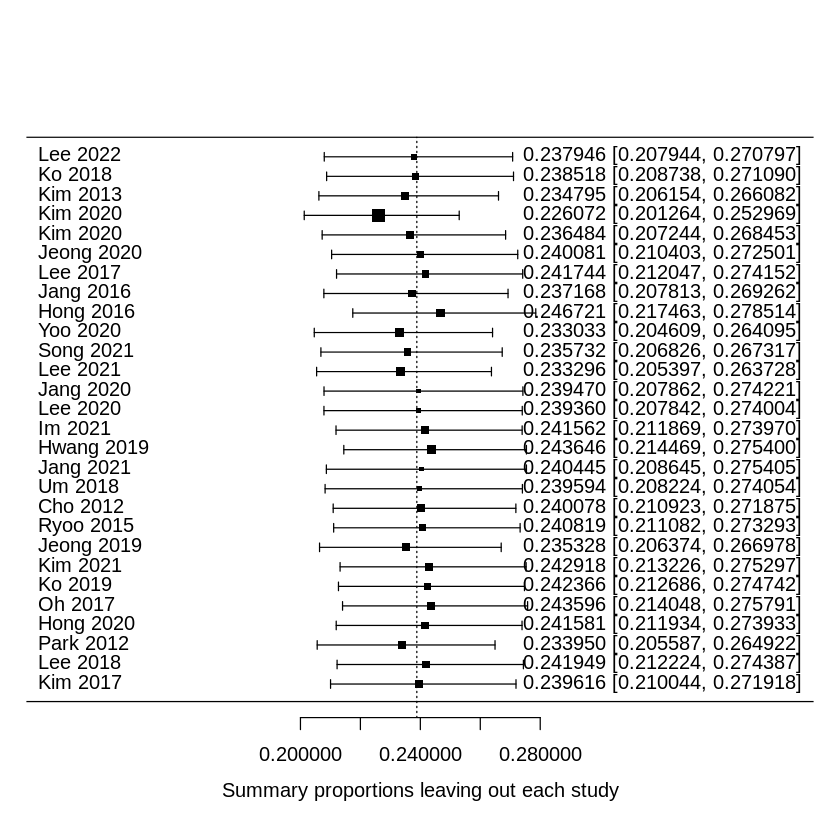

In [35]:
l1o=leave1out(pes.logit)
yi=l1o$estimate;vi=l1o$se^2
forest(yi,vi,transf=transf.ilogit,slab=sep1$AuthorYear,xlab="Summary proportions leaving out each study",refline=pes$pred,digits=6)
abline(h=0.1)
L1O=leave1out(pes.logit,transf=transf.ilogit);print(L1O,digits=6)

## Baujat plot

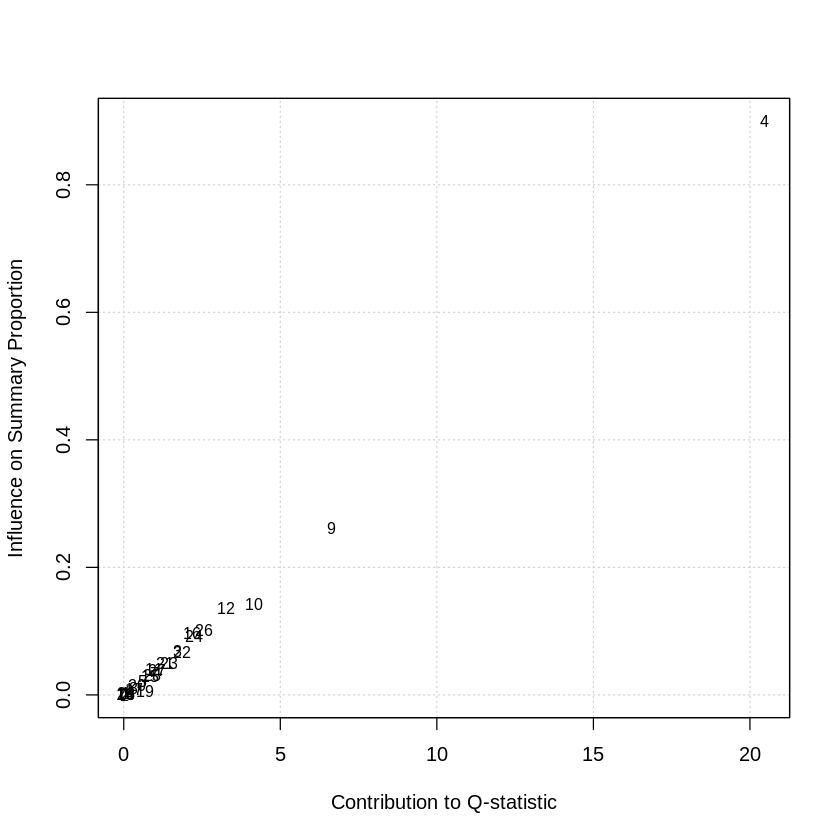

In [ ]:
baujat(pes.logit,xlab="Contribution to Q-statistic", ylab="Influence on Summary Proportion")

4,9 는 멀리 떨어져 있어서 outlier 로 생각됨

## Diagnostic tests


   rstudent  dffits cook.d  cov.r tau2.del   QE.del    hat weight    dfbs inf 
1    0.2596  0.0560 0.0033 1.0878   0.1862 621.6151 0.0393 3.9332  0.0560     
2    0.0892  0.0199 0.0004 1.0671   0.1825 626.7494 0.0382 3.8167  0.0199     
3    1.3521  0.2676 0.0692 1.0072   0.1712 588.3124 0.0383 3.8300  0.2673     
4    5.2292  0.9588 0.7109 0.7903   0.1309 464.1779 0.0351 3.5090  0.9653   * 
5    0.7858  0.1523 0.0233 1.0404   0.1779 619.8558 0.0361 3.6113  0.1523     
6   -0.4262 -0.0806 0.0066 1.0490   0.1797 627.2817 0.0353 3.5337 -0.0806     
7   -0.9987 -0.1879 0.0354 1.0394   0.1781 623.3437 0.0343 3.4293 -0.1879     
8    0.5564  0.1076 0.0116 1.0444   0.1788 623.7122 0.0356 3.5626  0.1075     
9   -2.7000 -0.5208 0.2562 0.9772   0.1661 581.7524 0.0354 3.5353 -0.5213     
10   2.1037  0.3843 0.1437 1.0028   0.1714 602.2168 0.0329 3.2911  0.3849     
11   1.0127  0.2039 0.0407 1.0206   0.1735 577.4399 0.0394 3.9447  0.2037     
12   1.9183  0.3765 0.1308 0.9626   0.1628 562.0775

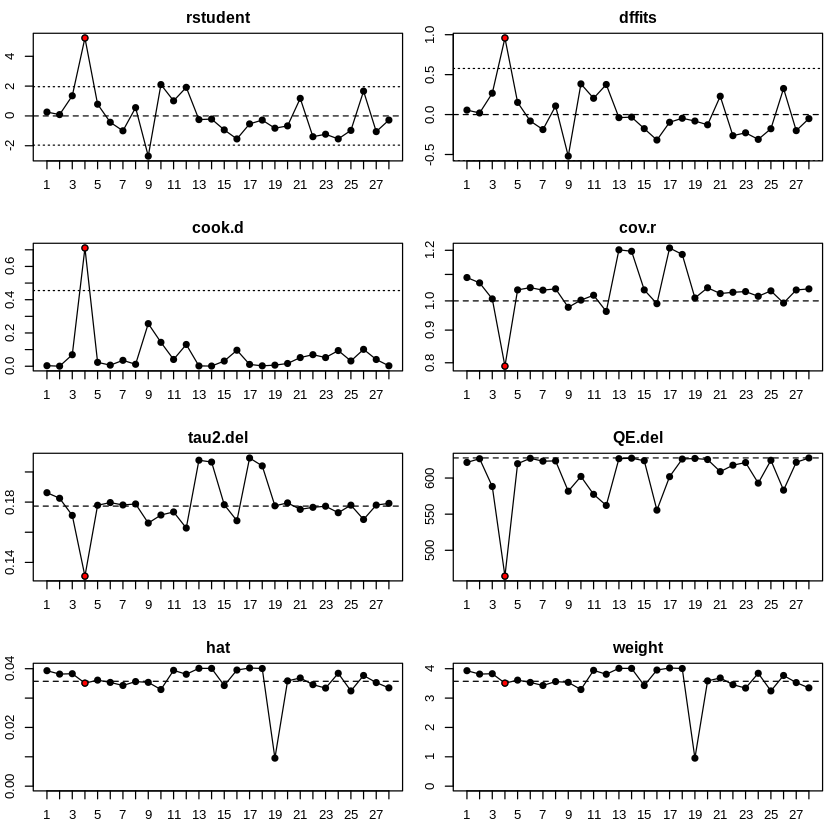

In [ ]:
inf=influence(pes.logit)
print(inf);plot(inf)

cooks distance 를 봐도 3,4, 19 가 outlier

## Removing outliers

In [66]:
subd = sep1[-c(4, 9),]

In [43]:
subd

Nstudy,AuthorYear,Center,Center_name,Sepsis_criteria,Endpoint,death,total,prop
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
19,Lee 2022,multicenter,Korean Sepsis Alliance (KSA),Sepsis-3,28-day,243,936,0.2596154
532,Ko 2018,multicenter,Korean Shock Society (KoSS),Sepsis-3,28-day,119,484,0.2458678
983,Kim 2013,multicenter,SAPS 3 in Korean Intensive care unit (VSKI) cohort,Spesis-2,28-day,148,416,0.3557692
234,Kim 2020,single,건국대병원,Sepsis-3,30-day,66,215,0.3069767
3875,Jeong 2020,single,건국대병원,Sepsis-3,30-day,48,233,0.2060086
3886,Lee 2017,single,건국대병원,Sepsis-3,30-day,37,222,0.1666667
3892,Jang 2016,single,건국대병원,Sepsis-2,28-day,57,199,0.2864322
272,Yoo 2020,single,경상대병원,Sepsis,30-day,44,98,0.4489796
1644,Song 2021,single,고대안산병원,Sepsis-3,30-day,294,910,0.3230769


In [44]:
pes.summary2=metaprop(death, #cases,
                     total, #total,
                     AuthorYear,
                     data=subd,
                     #sortvar(precision)
#                     byvar=Center,
                     sm="PLO",
                     method.ci="NAsm",
                     method.tau="DL",
                     incr=0.5,
                     allincr=FALSE,
                     addincr=FALSE,
#                     tau.common=TRUE,
#                     tau.preset=sqrt(subganal.studydesign$tau2),
                     title="")

In [45]:
png("forest_rm_out.png", width = 30, height = 20, units = 'cm', res = 300)
forest(pes.summary2,slab=subd$AuthorYear, xlab="Summary proportions", refline=pes.summary2$pred,digits=3, 
       squaresize = 0.5, col.square="navy", col.square.lines="navy",
#       rightcols=FALSE,
#       print.Q=TRUE,
#       print.pval.Q=TRUE,
       print.I2=TRUE,
       print.tau2=TRUE,
       col.by="black",
       col.diamond="maroon", col.diamond.lines="maroon" )
dev.off()

png 
  2

In [46]:
summary(pes.summary2)

           proportion           95%-CI %W(common) %W(random)
Lee 2022       0.2596 [0.2325; 0.2887]        4.9        4.4
Ko 2018        0.2459 [0.2095; 0.2862]        2.4        4.2
Kim 2013       0.3558 [0.3112; 0.4030]        2.6        4.2
Kim 2020       0.3070 [0.2490; 0.3718]        1.2        3.9
Jeong 2020     0.2060 [0.1589; 0.2628]        1.0        3.7
Lee 2017       0.1667 [0.1232; 0.2216]        0.8        3.6
Jang 2016      0.2864 [0.2279; 0.3531]        1.1        3.8
Yoo 2020       0.4490 [0.3537; 0.5482]        0.7        3.4
Song 2021      0.3231 [0.2935; 0.3542]        5.4        4.4
Lee 2021       0.4077 [0.3583; 0.4591]        2.4        4.2
Jang 2020      0.2192 [0.2048; 0.2343]       14.1        4.5
Lee 2020       0.2219 [0.2070; 0.2375]       13.4        4.5
Im 2021        0.1705 [0.1261; 0.2265]        0.8        3.6
Hwang 2019     0.1435 [0.1280; 0.1605]        5.9        4.4
Jang 2021      0.1977 [0.1863; 0.2096]       19.4        4.5
Um 2018        0.2169 [0

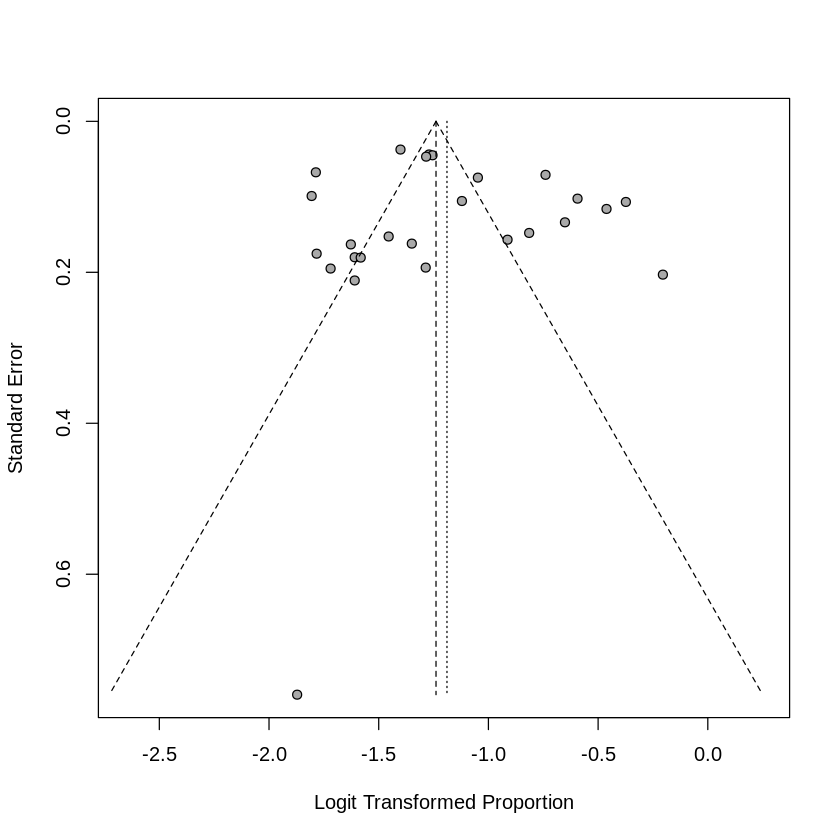

In [47]:
funnel.meta(pes.summary2)

In [48]:
metabias(pes.summary2)

Linear regression test of funnel plot asymmetry

Test result: t = 0.81, df = 24, p-value = 0.4275

Sample estimates:
   bias se.bias intercept se.intercept
 1.2057  1.4940   -1.3239       0.1254

Details:
- multiplicative residual heterogeneity variance (tau^2 = 17.0298)
- predictor: standard error
- weight:    inverse variance
- reference: Egger et al. (1997), BMJ

In [49]:

subd

Nstudy,AuthorYear,Center,Center_name,Sepsis_criteria,Endpoint,death,total,prop
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
19,Lee 2022,multicenter,Korean Sepsis Alliance (KSA),Sepsis-3,28-day,243,936,0.2596154
532,Ko 2018,multicenter,Korean Shock Society (KoSS),Sepsis-3,28-day,119,484,0.2458678
983,Kim 2013,multicenter,SAPS 3 in Korean Intensive care unit (VSKI) cohort,Spesis-2,28-day,148,416,0.3557692
234,Kim 2020,single,건국대병원,Sepsis-3,30-day,66,215,0.3069767
3875,Jeong 2020,single,건국대병원,Sepsis-3,30-day,48,233,0.2060086
3886,Lee 2017,single,건국대병원,Sepsis-3,30-day,37,222,0.1666667
3892,Jang 2016,single,건국대병원,Sepsis-2,28-day,57,199,0.2864322
272,Yoo 2020,single,경상대병원,Sepsis,30-day,44,98,0.4489796
1644,Song 2021,single,고대안산병원,Sepsis-3,30-day,294,910,0.3230769


In [53]:
pes.summary3=metaprop(death, #cases,
                     total, #total,
                     AuthorYear,
                     data=subd,
                     #sortvar(precision)
                     byvar=Center,
                     sm="PLO",
                     method.ci="NAsm",
                     method.tau="DL",
                     incr=0.5,
                     allincr=FALSE,
                     addincr=FALSE,
                     tau.common=TRUE,
                     title="")

In [58]:
png("forest3.png", width = 30, height = 30, units = 'cm', res = 300)
forest(pes.summary3,slab=subd$AuthorYear, xlab="Summary proportions", refline=pes.summary3$pred,digits=3, 
       squaresize = 0.5, col.square="navy", col.square.lines="navy",
#       rightcols=FALSE,
#       print.Q=TRUE,
#       print.pval.Q=TRUE,
       print.I2=TRUE,
       print.tau2=TRUE,
       col.by="black",
       col.diamond="maroon", col.diamond.lines="maroon" )
dev.off()

png 
  2

In [84]:
subd2 = subd[-c(8,11,15),]

In [88]:
pes.summary3=metaprop(death, #cases,
                     total, #total,
                     AuthorYear,
                     data=subd,
                     #sortvar(precision)
                     byvar=Sepsis_criteria,
                     sm="PLO",
                     method.ci="NAsm",
                     method.tau="DL",
                     incr=0.5,
                     allincr=FALSE,
                     addincr=FALSE,
                     tau.common=TRUE,
                     title="")

In [89]:
png("forest4.png", width = 30, height = 30, units = 'cm', res = 300)
forest(pes.summary3,slab=subd$AuthorYear, xlab="Summary proportions", refline=pes.summary3$pred,digits=3, 
       squaresize = 0.5, col.square="navy", col.square.lines="navy",
#       rightcols=FALSE,
#       print.Q=TRUE,
#       print.pval.Q=TRUE,
       print.I2=TRUE,
       print.tau2=TRUE,
       col.by="black",
       col.diamond="maroon", col.diamond.lines="maroon" )
dev.off()

png 
  2